In [ ]:
import pandas as pd

# Carregamento do CSV
caminho = "C:/Users/118920631/Desktop/Projeto - IA generativa para linguagem/articles.csv"
df = pd.read_csv(caminho)

# Verificar colunas e primeiras linhas
print(df.columns)
df.head()

Index(['title', 'text', 'date', 'category', 'subcategory', 'link'], dtype='object')


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


In [4]:
# Converter a coluna de data para datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrar por categoria "mercado" e datas do primeiro trimestre de 2015
df_mercado_q1 = df[
    (df['category'].str.lower() == 'mercado') &
    (df['date'] >= '2015-01-01') &
    (df['date'] < '2015-04-01')
].copy()

# Verificar quantidade e algumas linhas
print(f"Número de notícias da seção 'mercado' no 1º tri de 2015: {len(df_mercado_q1)}")
df_mercado_q1[['title', 'date']].head()

Número de notícias da seção 'mercado' no 1º tri de 2015: 2111


,title,date
99055,Prioridade ao pós-pago reduz número de linhas ...,2015-03-12
99063,Dilma sanciona meta fiscal e governo liberará ...,2015-03-12
99064,Reportagem da Folha sobre investidor mais jove...,2015-03-12
99074,Impeachment pode prejudicar ajuste fiscal no B...,2015-03-12
99076,Petrobras anuncia 2º reajuste no preço do gás ...,2015-03-12


In [5]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from collections import Counter
import tqdm

# Carregar o modelo
modelo = "monilouise/ner_pt_br"
tokenizer = AutoTokenizer.from_pretrained(modelo)
model = AutoModelForTokenClassification.from_pretrained(modelo)

# Criar pipeline com agregação de entidades
ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

c:\Users\118920631\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\118920631\.cache\huggingface\hub\models--monilouise--ner_pt_br. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

c:\Users\118920631\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
org_counter = Counter()

for texto in tqdm.tqdm(df_mercado_q1['text'].dropna(), desc="Analisando entidades"):
    try:
        entidades = ner(texto)
        for ent in entidades:
            if ent['entity_group'] == 'ORG':
                org_counter[ent['word']] += 1
    except Exception:
        continue

Analisando entidades: 100%|██████████| 2111/2111 [13:10<00:00,  2.67it/s]


In [7]:
# Obter top 15 organizações mais citadas
top_orgs = org_counter.most_common(15)

# Converter para DataFrame
import pandas as pd

df_orgs = pd.DataFrame(top_orgs, columns=["Organizacao", "Frequencia"])
df_orgs


,Organizacao,Frequencia
0,Folha,530
1,O,257
2,s,156
3,Brasil,141
4,##i,119
5,Sete,105
6,Brad,98
7,B,96
8,##S,95
9,##BC,94


In [8]:
# Remover entidades com 3 caracteres ou menos, que não sejam nomes válidos
df_orgs_limpo = df_orgs[df_orgs["Organizacao"].str.len() > 3]

# Remover tokens iniciados com '#', comuns em subpalavras do BERT
df_orgs_limpo = df_orgs_limpo[~df_orgs_limpo["Organizacao"].str.startswith("#")]

# Visualizar resultado limpo
df_orgs_limpo.reset_index(drop=True, inplace=True)
df_orgs_limpo.head(10)


,Organizacao,Frequencia
0,Folha,530
1,Brasil,141
2,Sete,105
3,Brad,98
4,Moody ',78


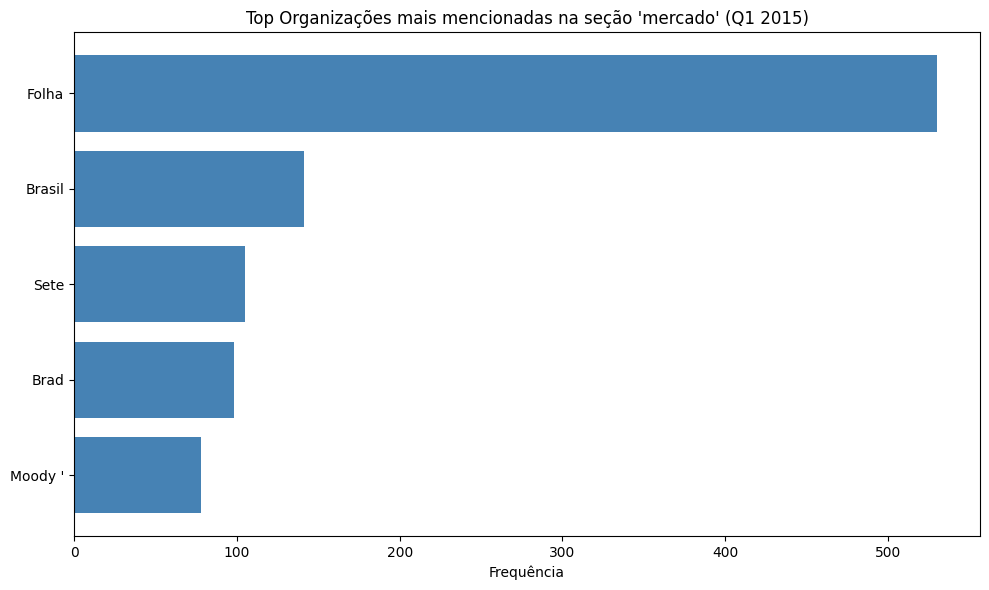

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_orgs_limpo["Organizacao"], df_orgs_limpo["Frequencia"], color='steelblue')
plt.xlabel("Frequência")
plt.title("Top Organizações mais mencionadas na seção 'mercado' (Q1 2015)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [10]:
# Dicionário de renomeações manuais
renomeacoes = {
    "Brad": "Bradesco",
    "Brades": "Bradesco",
    "Brade": "Bradesco",
    "Bradesc": "Bradesco",
    "Moody '": "Moody’s",
    "Sete": "Sete Brasil",   # Supondo que se refira à empresa Sete Brasil
    "Folha": "Folha de S.Paulo",
    "Brasil": "Banco do Brasil"  # Se nas amostras o uso for institucional
}

# Aplicar as renomeações
df_orgs_renomeado = df_orgs_limpo.copy()
df_orgs_renomeado["Organizacao"] = df_orgs_renomeado["Organizacao"].replace(renomeacoes)

# Agrupar por nova organização e somar frequências
df_orgs_final = df_orgs_renomeado.groupby("Organizacao", as_index=False)["Frequencia"].sum()

# Reordenar por frequência
df_orgs_final = df_orgs_final.sort_values(by="Frequencia", ascending=False).reset_index(drop=True)

# Exibir top 10
df_orgs_final.head(10)


,Organizacao,Frequencia
0,Folha de S.Paulo,530
1,Banco do Brasil,141
2,Sete Brasil,105
3,Bradesco,98
4,Moody’s,78


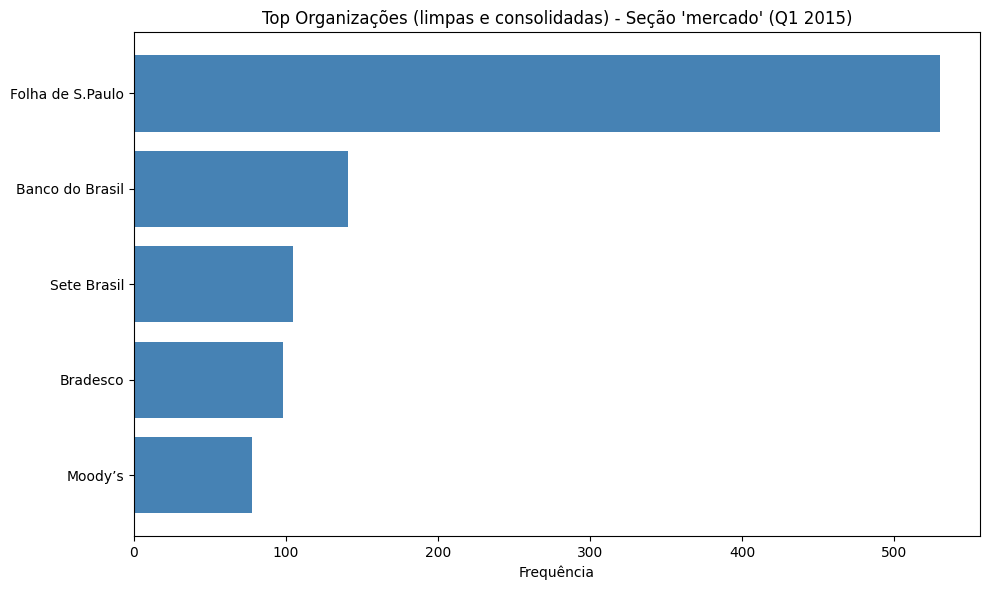

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(df_orgs_final["Organizacao"][:10], df_orgs_final["Frequencia"][:10], color='steelblue')
plt.xlabel("Frequência")
plt.title("Top Organizações (limpas e consolidadas) - Seção 'mercado' (Q1 2015)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
